In [1]:
%matplotlib inline 

In [2]:
pwd

'/home/andre/Projects/stocks/prototypes'

In [3]:
cd ..

/home/andre/Projects/stocks


In [4]:
from matplotlib import pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import struct
import datetime
import calendar
import time
import argparse
import seaborn as sns
from algos import meta5Ibov
from algos.util import progressbar
from algos import meta5Ibov, bbands3, bbands2
import importlib
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
import scipy
import talib as ta
from numba import jit
import importlib

/home/andre/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
cd data

/home/andre/Projects/stocks/data


In [6]:
# meta5Ibov.setDataPath(r'C:\\Users\\alferreira\\Documents\\stocks\\data', 
#                      r'C:\\Users\\alferreira\\Documents\\stocks\\data')
meta5Ibov.setDataPath(r'/home/andre/Projects/stocks/data', 
                        r'/home/andre/Projects/stocks/data')


Master data loaded size (minutes):  509471
symbols loaded:
['BBAS3' 'DOL$' 'VALE3' 'ABEV3' 'ITUB4' 'B3SA3' 'BBDC4' 'PETR4' 'WIN@']


In [7]:
meta5Ibov.symbols

0    BBAS3
1     DOL$
2    VALE3
3    ABEV3
4    ITUB4
5    B3SA3
6    BBDC4
7    PETR4
8     WIN@
dtype: object

In [8]:
loaded = meta5Ibov.loadMeta5Data(suffix='M1.mt5bin', verbose=False)
bars = meta5Ibov.getSymbol('WIN@')

Using previous loaded data!


In [9]:
bars.head()

,O,H,L,C,TV,S,RV
time,,,,,,,
2014-01-02 10:06:00,80088.0,80118.0,80049.0,80088.0,1690,1,481
2014-01-02 10:07:00,80080.0,80080.0,80034.0,80049.0,670,1,184
2014-01-02 10:08:00,80041.0,80057.0,80010.0,80049.0,690,1,139
2014-01-02 10:09:00,80049.0,80049.0,80018.0,80026.0,210,1,43
2014-01-02 10:10:00,80034.0,80041.0,79632.0,79725.0,4740,1,1638


In [10]:
bars.shape

(509471, 7)

In [11]:
np.diff([1, 3, 3, 4])

array([2, 0, 1])

In [12]:
bars.loc[:, 'emaH'] = ta.EMA(bars.H.values, 3)
bars.loc[:, 'emaL'] = ta.EMA(bars.L.values, 3)
bars.loc[1:, 'dH1'] = np.diff(bars.emaH)
#bars.loc[2:, 'dH2'] = np.diff(bars.emaH, 2)
bars.loc[1:, 'dL1'] = np.diff(bars.emaL)
#bars.loc[2:, 'dL2'] = np.diff(bars.emaL, 2)
bars.loc[:, 'stdH'] = ta.STDDEV(bars.H.values, 3)
bars.loc[:, 'stdL'] = ta.STDDEV(bars.L.values, 3)

In [13]:
bars[-320:-200].head()

,O,H,L,C,TV,S,RV,emaH,emaL,dH1,dL1,stdH,stdL
time,,,,,,,,,,,,,
2019-01-17 12:35:00,94780.0,94820.0,94770.0,94770.0,5053,0,19618,94785.134383,94721.922212,34.865617,48.077788,28.963579,62.494444
2019-01-17 12:36:00,94770.0,94800.0,94745.0,94775.0,4103,0,15457,94792.567192,94733.461106,7.432808,11.538894,10.801234,13.123346
2019-01-17 12:37:00,94775.0,94895.0,94775.0,94880.0,7812,0,26542,94843.783596,94754.230553,51.216404,20.769447,40.892814,13.123346
2019-01-17 12:38:00,94880.0,94970.0,94875.0,94920.0,6784,0,24178,94906.891798,94814.615277,63.108202,60.384723,69.562123,55.577773
2019-01-17 12:39:00,94920.0,94930.0,94840.0,94865.0,5692,0,20118,94918.445899,94827.307638,11.554101,12.692362,30.641294,41.432676


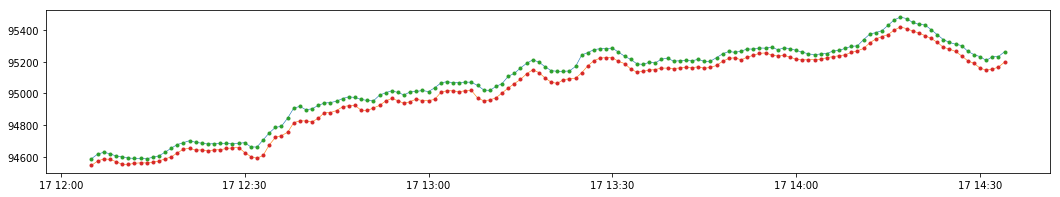

In [14]:
fig = plt.figure(figsize=(18,3))
plt.plot(bars[['emaH', 'emaL']][-350:-200], lw=0.6)
plt.plot(bars[['emaH', 'emaL']][-350:-200],'.')

### This standardization is not needed is just for viewing better

In [15]:
barv = bars.copy()
barv.loc[:, ['dH1','dL1', 'stdH', 'stdL']] = \
    barv.loc[:, ['dH1', 'dL1', 'stdH', 'stdL']].apply(
    lambda x: x.clip(*x.quantile([0.001, 0.999]).values), axis=0)

/home/andre/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/andre/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


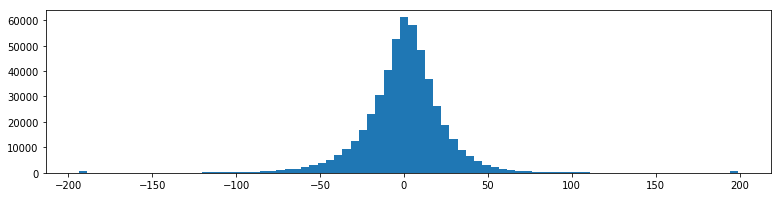

In [16]:
plt.figure(figsize=(13,3))
plt.hist(barv.dL1, bins=80);

### Dumb tentatives

#### A. 

1. If last 6 minutes H is increasing and positive first derivative
2. If last 6 minutes L is increasing and positive first derivative
3. If stdev H and L is well behaved on the last 6 minutes. Not smaller than 3*5 points.

  **than we buy and sell 2 minutes latter**

Less than 10 entries in 5 years. 

Lets change a bit

#### B.

1. If last 5 minutes ema H 3 is increasing and positive first derivative
2. If last 5 minutes ema L 3 is increasing and positive first derivative
3. If stdev H and L is well behaved on the last 5 minutes. Not smaller than 3*5 points.
4. If stdev H and L is well behaved on the last 5 minutes. Not bigger than 18*5 points.

  **than we buy and sell 2 minutes latter**

Ok average 2 entries per day on 5 years.

In [17]:
# def buy(dH1,
#bars.query('dH1 > 0 and dL1 > 0')

In [18]:
bars.fillna(0, inplace=True)

In [19]:
a12 = np.logical_and(bars.dL1.values > 0, bars.dH1.values > 0)
a3 = np.logical_and(bars.stdH.values > 15, bars.stdL.values > 15)
a4 = np.logical_and(bars.stdH.values < 90, bars.stdL.values < 90)
a3 =  np.logical_and(a3, a4)
af = np.logical_and(a12, a3)*1

In [20]:
nrepeat = 5

In [21]:
af = np.convolve(af, [1]*nrepeat, mode='same') # identifying 6 minutes of pattern

Everytime we get a 6 we have an entry

In [22]:
np.argwhere(af==nrepeat)

array([[   452],
       [   704],
       [   714],
       ...,
       [509189],
       [509190],
       [509191]])

Number of average entries per day

In [23]:
60*7*len(np.argwhere(af==nrepeat))/len(bars)

2.300857163606957

In [24]:
af[:100]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 3, 2, 3, 3, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 3,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0])

Checking profitability 

. on worst case scenario buy on high sell on low will definitally not make profit. 


In [25]:
entries = np.argwhere(af==nrepeat).flatten()

In [26]:
entries 

array([   452,    704,    714, ..., 509189, 509190, 509191])

- It is critical that the entry is on the `Open Price` or very close to it
otherwise the accuracy decrease drastically.  

In [40]:
bars.head()

,O,H,L,C,TV,S,RV,emaH,emaL,dH1,dL1,stdH,stdL
time,,,,,,,,,,,,,
2014-01-02 10:06:00,80088.0,80118.0,80049.0,80088.0,1690,1,481,0.0,0.00,0.0,0.00,0.000000,0.000000
2014-01-02 10:07:00,80080.0,80080.0,80034.0,80049.0,670,1,184,0.0,0.00,0.0,0.00,0.000000,0.000000
2014-01-02 10:08:00,80041.0,80057.0,80010.0,80049.0,690,1,139,80085.0,80031.00,0.0,0.00,25.152866,16.062378
2014-01-02 10:09:00,80049.0,80049.0,80018.0,80026.0,210,1,43,80067.0,80024.50,-18.0,-6.50,13.140269,9.977753
2014-01-02 10:10:00,80034.0,80041.0,79632.0,79725.0,4740,1,1638,80054.0,79828.25,-13.0,-196.25,6.531973,180.106142


In [61]:
np.random.randint(0, 4)

2

In [41]:
bars['OHLC'] = bars.O + bars.H + bars.L + bars.C)

In [42]:
profit = bars.O.iloc[entries+3].values-bars.OHLC.iloc[entries+1].values

In [43]:
np.percentile(profit, [0, 10, 50, 90])

array([-629.  ,  -21.25,   33.25,   95.5 ])

What probability of ending up with more than 0

In [45]:
scipy.stats.percentileofscore(profit, 0)

21.24686492296668

In [46]:
profit = np.clip(profit, *np.percentile(profit, [0.1, 99.9]))

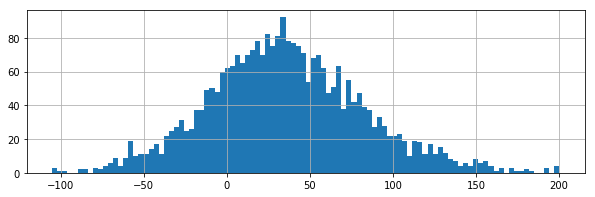

In [47]:
plt.figure(figsize=(10,3))
plt.hist(profit, bins=100);
plt.grid()

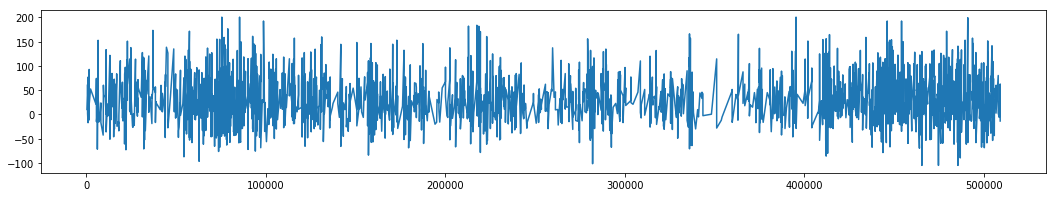

In [48]:
plt.figure(figsize=(18,3))
plt.plot(entries, profit)

Last two months

In [49]:
accs = (profit > 0) * 1

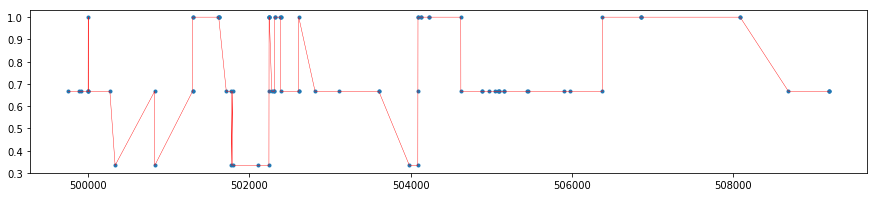

In [50]:
plt.figure(figsize=(15,3))
plt.plot(entries[-42*2:], ta.SMA(accs[-42*2:].astype(float), 3), '.')
plt.plot(entries[-42*2:], ta.SMA(accs[-42*2:].astype(float), 3), '-r', lw=0.4)

In [51]:
def percentile(N, P):
    n = max(int(round(P * len(N) + 0.5)), 2)
    return N[n-2]

In [52]:
percentile(np.sort(profit), .993)

159.5

In [53]:
np.percentile(profit, 99.3)

159.85249999999985

In [38]:
round?